In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_MoI_from_data(filename):
    folder_path = os.path.join('data', 'simulation_results', 'plot_MoI')
    file_path = os.path.join(folder_path, filename)

    df = pd.read_csv(file_path, names=['r', 'm', 'p', 'rho', 'I_norm', 'T'], skiprows=1, nrows=1)
    MoI = df['I_norm'][0]
    return MoI

lit_MoI_dir = {
    'Earth' : 0.3307,   # Williams, James G. Contribution to the Earth's Obliquity Rate, Precession, and Nutation
    'Jupiter' : 0.254,  # [J]
    'Saturn' : 0.210,   # [J]
    'Uranus' : 0.225    # [J]
}

ToF_MoI_dir = {
    'Earth' : 0.000,   
    'Jupiter' : 0.283,  
    'Saturn' : 0.266,   
    'Uranus' : 0.367    
}

ToF_J_dir = {
    'Earth' : ['','','',''],   
    'Jupiter' : ['J_2 = 1.5358e-06 +/- nan', 'J_4 = -6.0744e-12 +/- nan', 'J_6 = 3.5163e-17 +/- nan', 'J_8 = -2.8233e-22 +/- nan'],  
    'Saturn' : ['J_2 = 2.5401e-06 +/- nan', 'J_4 = -1.9541e-11 +/- nan', 'J_6 = 2.2160e-16 +/- nan', 'J_8 = -4.0047e-21 +/- nan'],   
    'Uranus' : ['J_2 = 1.9162e-06 +/- nan', 'J_4 = -8.4884e-12 +/- nan', 'J_6 = 5.0083e-17 +/- nan', 'J_8 = -3.8154e-22 +/- nan']   
}

planet_files = {
    'Earth'   : 'Earth_04_analytical_MgSiO3_RK45_theta_2.csv',
    'Jupiter' : 'Jupiter_02_polytropic_RK45_theta_2.csv',
    'Saturn'  : 'Saturn_02_polytropic_RK45_theta_2.csv',
    'Uranus'  : 'Uranus_05_tabulated_H_RK45_theta_2.csv'
}

for planet in ['Earth', 'Jupiter', 'Saturn', 'Uranus']:
    print(f'\n=== {planet} ===')
    filename = planet_files[planet]
    MoI = get_MoI_from_data(filename)
    lit_MoI = lit_MoI_dir[planet]
    ToF_MoI = ToF_MoI_dir[planet]
    print(f'my:  {MoI:.3f}')
    print(f'lit: {lit_MoI:.3f}')
    print(f'ToF: {ToF_MoI:.3f}')

# ---------------- References ---------------
# [A]   Archinal, B.A. et al. 2018. "Report of the IAU/IAG Working Group on cartographic coordinates and rotational elements: 2015" Celestial Mech. Dyn. Astr. 130:22.
# [B]   https://doi.org/10.1007%2Fs10569-007-9072-y
# [C]   https://ui.adsabs.harvard.edu/abs/1992AJ....103.2068J/abstract
# [D]   https://www.sciencedirect.com/science/article/abs/pii/0032063395000615?via%3Dihub
# [E]   Folkner, W.M. and Williams, J.G. 2008. "Mass parameters and uncertainties in planetary ephemeris DE421." Interoffice Memo. 343R-08-004 (internal document), Jet Propulsion Laboratory, Pasadena, CA.
# [F]   https://ssd.jpl.nasa.gov/planets/phys_par.html
# [G]   Jacobson, R.A., et al. 2006. "The gravity field of the Saturnian system from satellite observations and spacecraft tracking data" AJ 132(6):2520-2526.
# [H]   Jacobson, R.A. 2014. "The Orbits of the Uranian Satellites and Rings, the Gravity Field of the Uranian System, and the Orientation of the Pole of Uranus" AJ 148:76-88.
# [I]   Helled, R. & Guillot, T. (2018). Internal Structure of Giant and Icy Planets: Importance of Heavy Elements and Mixing. H.J. Deeg, J.A. Belmonte (eds.), Handbook of Exoplanets.
# [J]   https://arxiv.org/pdf/2407.05853 (Ravit Helled and Saburo Howard. Giant planet interiors and atmospheres)



=== Earth ===
my:  0.339
lit: 0.331
ToF: 0.000

=== Jupiter ===
my:  0.273
lit: 0.254
ToF: 0.283

=== Saturn ===
my:  0.204
lit: 0.210
ToF: 0.266

=== Uranus ===
my:  0.201
lit: 0.225
ToF: 0.367


#### ToF

In [3]:
def get_density_from_data(filename):
    folder_path = os.path.join('data', 'simulation_results', 'plot_MoI')
    file_path = os.path.join(folder_path, filename)

    df = pd.read_csv(file_path, names=['r', 'm', 'p', 'rho', 'I_norm', 'T'], skiprows=1)
    r = df['r'].to_numpy()
    rho = df['rho'].to_numpy() 
    return r, rho

In [4]:
from PyToF import ClassToF

X = ClassToF.ToF()

No reference radius supplied by the user. PyToF assumes R_ref = R_phys.


[58232000.         58231944.41586727 58231777.4358402  58231499.40139122
 58231109.7433608  58230609.25859559 58229996.92256179 58229273.98748036
 58228438.9734432  58227493.58804551 58226435.896005   58225268.06029107
 58223987.6902472  58222597.40421703 58221094.3561698  58219481.6198234
 58217755.8937728  58215920.70711016 58213972.3030562  58211914.66607731
 58209743.58402    58207463.49672487 58205069.7366642  58202567.19905282
 58199950.7609888  58197225.77306119 58194386.6569938  58191439.21874996
 58188377.4246792  58185207.53611911 58181923.064045   58178527.19601832
 58175023.5750912  58171405.02906115 58167678.9578178  58163837.73378439
 58159889.2122248  58155825.31018803 58151654.33831219 58147367.75827207
 58142974.33608    58138465.07803652 58133849.2055282  58129117.26948135
 58124278.9466568  58119324.33260659 58114263.5594658  58109086.26741223
 58103803.0439552  58098403.07389827 58092897.400125   58087274.75206473
 58081546.6279752  58075701.30191156 58069750.727505

C:\Users\felix\AppData\Roaming\Python\Python312\site-packages\PyToF\AlgoToF.py:112: RuntimeWarning: divide by zero encountered in divide
  dJs = np.abs((Js[mask] - new_Js[mask])/Js[mask])
C:\Users\felix\AppData\Roaming\Python\Python312\site-packages\PyToF\AlgoToF.py:112: RuntimeWarning: invalid value encountered in divide
  dJs = np.abs((Js[mask] - new_Js[mask])/Js[mask])


Number of iterations used by the algorithm: 99
Saturn NMoI: 0.264200563289777
PyToF solutions: ['J_2 = 2.5851e-06 +/- nan', 'J_4 = -1.9983e-11 +/- nan', 'J_6 = 2.2755e-16 +/- nan', 'J_8 = -4.1369e-21 +/- nan']


findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

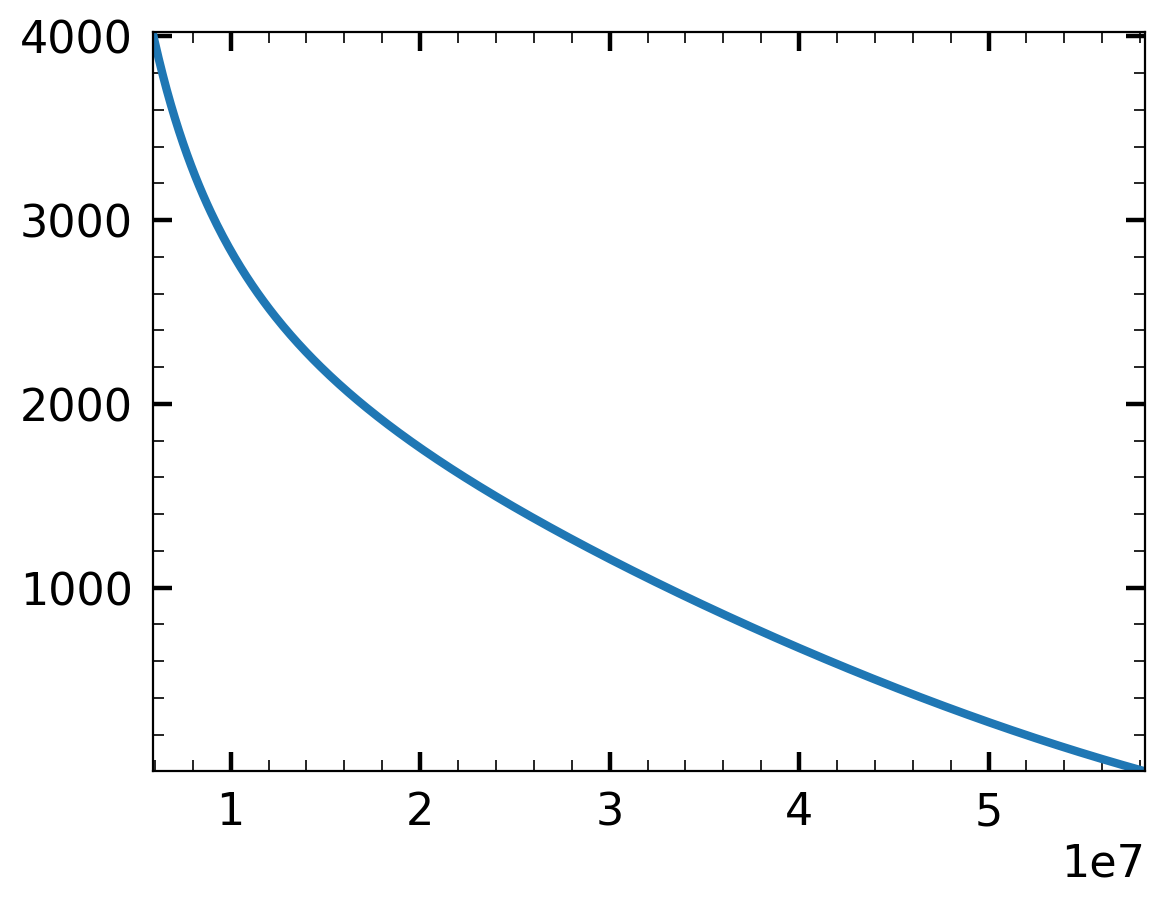

In [19]:
def sample_evenly(arr, max_len=1024):
    arr = np.asarray(arr)
    n = len(arr)
    if n <= max_len:
        return arr  # no sampling needed

    # choose 1024 indices evenly spaced from 0 to n-1
    idx = np.linspace(0, n - 1, max_len, dtype=int)
    return arr[idx]

import matplotlib.pyplot as plt
plt.figure()

for planet in ['Saturn']:#, 'Saturn', 'Uranus', 'Earth']: 
    if planet == 'Jupiter':
        period = 35730      # s         [J]
    elif planet == 'Saturn':
        period = 38361.6    # s         [J]
    elif planet == 'Uranus':
        period = 62064      # s         [J]
    elif planet == 'Earth':
        period = 86164      # s   

    filename = planet_files[planet]
    r, rho = get_density_from_data(filename)
    N = len(r)

    radii = r / 100 # cm -> m
    radius = r[0]
    densities = rho * 1000 # g/cm^3 -> kg/m^3

    radii = sample_evenly(radii)
    densities = sample_evenly(densities)

    mask = radii > 0.1*np.max(radii)

    radii = radii[mask]
    densities = densities[mask]

    print(radii)
    print(densities)

    mass = -4*np.pi*np.trapezoid(densities*radii**2, radii) #calculated mass in SI units (kg), negative sign because array starts with the outer surface


    X = ClassToF.ToF(N=N, M_phys=mass, R_phys=[radius, 'mean'], Period=period) #all radius options: 'equatorial', 'mean', 'polar'

    X.li         = radii
    X.rhoi       = densities
    X.m_rot_calc = (2*np.pi/period)**2*X.li[0]**3/(X.opts['G']*mass)

    number_of_iterations = X.relax_to_shape()
    print('Number of iterations used by the algorithm:', number_of_iterations)

    print(f'{planet} NMoI: {X.get_NMoI()}')
    print('PyToF solutions:', ['J_'+str(2*i)   +' = ' + "{:.4e}".format(X.Js[i]) + ' +/- ' + "{:.1e}".format(X.Js_error[i]) for i in range(1,5)])
    
    
    plt.plot(radii, densities)

plt.show()